In [1]:
import pandas as pd
import micom
from gurobipy import *
import numpy as np
from micom import load_pickle
from micom.media import minimal_medium
import random
from micom.workflows import workflow

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import cobra
# https://resendislab.github.io/micom/media.html

In [2]:
#Number of samples

In [3]:
n = 254 #+2 = 256

In [4]:
#Get random values for the abundances. The sum of the three values should add to 1

In [10]:
x = [0]*n
y = [0]*n
z = [0]*n

In [6]:
for i in range(n):
    x[i] = random.random()
    y[i] = random.uniform(0, 1.0-x[i])
    z[i] = 1.0-x[i]-y[i]

In [7]:
# Another method to obtain random number that added sum to 1
'''
for i in range(n):
    x[i] = random.random()
    y[i] = random.random()
    z[i] = random.random()
    temp  = x[i]+y[i]+z[i]
    x[i] = x[i]/temp
    y[i] = y[i]/temp
    z[i] = z[i]/temp
'''

In [8]:
#Create arrays to store the 256 communities; each community with the random abundances (random numbers)

In [9]:
d = [0]*(n+2)
df = [0]*(n+2)
nm=(n+2)/2

In [ ]:
# Define 254 communities

In [10]:
for i in range(int(nm)):
    d[i] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May16_div50_NormalObj.xml', '../SBMLS/cobraB_May16_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[x[i], y[i], z[i]]
    }
    df[i]=pd.DataFrame(data=d[i])

In [12]:
#Define community with experimental abundance data from 6th day of culture

d[n] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May16_div50_NormalObj.xml', '../SBMLS/cobraB_May16_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[0.08955224, 0.3880597, 0.5149254]
    }
df[n] = pd.DataFrame(data=d[n])

In [13]:
#Define community with experimental abundance data from 19th day of culture

d[n+1] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May16_div50_NormalObj.xml', '../SBMLS/cobraB_May16_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[0.573913, 0.273913, 0.1521739]
    }
df[n+1] = pd.DataFrame(data=d[n+1])

In [14]:
#Make array to store communities

In [4]:
com = [0]*(n+2)

In [16]:
#Create new communities and save them as pickle -> If you have previously created pickles, skip this step

In [17]:
for i in range(len(com)):
    com[i] = micom.Community(df[i],solver="gurobi")
    print(i)

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\santi\gurobi\gurobi.lic



0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99



100



101



102



103



104



105



106



107



108



109



110



111



112



113



114



115



116



117



118



119



120



121



122



123



124



125



126



127



128



129



130



131



132



133



134



135



136



137



138



139



140



141



142



143



144



145



146



147



148



149



150



151



152



153



154



155



156



157



158



159



160



161



162



163



164



165



166



167



168



169



170



171



172



173



174



175



176



177



178



179



180



181



182



183



184



185



186



187



188



189



190



191



192



193



194



195



196



197



198



199



200



201



202



203



204



205



206



207



208



209



210



211



212



213



214



215



216



217



218



219



220



221



222



223



224



225



226



227



228



229



230



231



232



233



234



235



236



237



238



239



240



241



242



243



244



245



246



247



248



249



250



251



252



253



254



255


In [18]:
for i in range(len(com)):
    com[i].to_pickle("./models/community_scan_May26_"+str(i)+".pickle")    

In [19]:
#Load communities (pickles) previously created

In [5]:
for i in range(len(com)):
    com[i]=load_pickle("./models/community_scan_May16_"+str(i)+".pickle")
    print(i) 

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\santi\gurobi\gurobi.lic
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpfplk2rqz.lp
Reading time = 0.16 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
0
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp_6kbxme8.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
1
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp6b6ow40b.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
2
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpehpca8c6.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
3
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmptv6tjhzg.lp
Reading time = 0.14 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
4
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp8xjb5ug0.lp
Reading time = 0.13 seconds
: 3200 rows,

52
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp68_j1tc1.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
53
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpts8euhpd.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
54
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpzk_v6egv.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
55
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmporsvngzy.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
56
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpbamgx50l.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
57
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpvv27kpuk.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
58
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp5rp67gtk.lp

Reading time = 0.14 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
106
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpcepz8iqn.lp
Reading time = 0.15 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
107
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmptmztlapn.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
108
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpv8zy937o.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
109
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp66k615z1.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
110
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpsyidsiqt.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
111
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpt0476w85.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
112
Re

159
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpvp5eijs1.lp
Reading time = 0.12 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
160
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpoqu5ftcb.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
161
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpiltbugom.lp
Reading time = 0.16 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
162
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpzz8_8fcc.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
163
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpr_7dp0z0.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
164
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpvw2byf_7.lp
Reading time = 0.15 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
165
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp84hn

Reading time = 0.11 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
213
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpcfvb03tw.lp
Reading time = 0.11 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
214
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp5ueksjjs.lp
Reading time = 0.12 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
215
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmps7_2adf5.lp
Reading time = 0.12 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
216
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpns2dalx4.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
217
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpf314lf1y.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
218
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpp1ce13r3.lp
Reading time = 0.15 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
219
Re

In [6]:
# Create a dictionary that maps the number of each community to a unique ID that will later be used.
x={}
for i,c in enumerate(com):
    x[str(i)]='com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4))

{'0': 'com_0.5926_0.1428_0.2645',
 '1': 'com_0.4204_0.1143_0.4653',
 '2': 'com_0.2301_0.1709_0.5989',
 '3': 'com_0.3846_0.4621_0.1533',
 '4': 'com_0.6891_0.0611_0.2498',
 '5': 'com_0.3257_0.0085_0.6658',
 '6': 'com_0.6649_0.0871_0.248',
 '7': 'com_0.1316_0.503_0.3654',
 '8': 'com_0.3852_0.2782_0.3366',
 '9': 'com_0.2242_0.113_0.6628',
 '10': 'com_0.4273_0.4536_0.1191',
 '11': 'com_0.0155_0.1524_0.8321',
 '12': 'com_0.5852_0.4119_0.0029',
 '13': 'com_0.1062_0.4532_0.4407',
 '14': 'com_0.0081_0.5206_0.4712',
 '15': 'com_0.1419_0.3597_0.4983',
 '16': 'com_0.1644_0.5839_0.2518',
 '17': 'com_0.1522_0.1018_0.746',
 '18': 'com_0.3335_0.2976_0.369',
 '19': 'com_0.3527_0.5428_0.1044',
 '20': 'com_0.2245_0.5255_0.25',
 '21': 'com_0.1076_0.4865_0.4058',
 '22': 'com_0.3298_0.4181_0.2522',
 '23': 'com_0.3484_0.1582_0.4933',
 '24': 'com_0.1251_0.2178_0.6571',
 '25': 'com_0.5002_0.2972_0.2026',
 '26': 'com_0.4465_0.2393_0.3142',
 '27': 'com_0.0165_0.3801_0.6033',
 '28': 'com_0.3351_0.1051_0.5598',
 '

In [13]:
#Generate data for some images (based on the codes used to generate figures of the micom paper - PLEASE SEE README)

In [14]:
dt = {'sample':[],'run_accession':[],'subset':[],'type':[],'status':[]}
dt_sp = {'samples':[],'name':[],'reads':[],'relative':[],'genus':[]}
for i,c in enumerate(com):
    dt['sample'].append(i)
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    
    dt['run_accession'].append('com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4)))
    dt_sp['name'].append('A')
    dt_sp['name'].append('B')
    dt_sp['name'].append('C')
    
    dt['subset'].append('MCF7')
    dt_sp['reads'].append(1)
    dt_sp['reads'].append(1)
    dt_sp['reads'].append(1)
    
    dt['type'].append('spheroid_syn')
    dt_sp['relative'].append(c.abundances['A'])
    dt_sp['relative'].append(c.abundances['B'])
    dt_sp['relative'].append(c.abundances['C'])
    
    dt['status'].append('OK')
    dt_sp['genus'].append('A')
    dt_sp['genus'].append('B')
    dt_sp['genus'].append('C')
dtfm = pd.DataFrame(data=dt)
dtfm_sp = pd.DataFrame(data=dt_sp)
dtfm_sp

,samples,name,reads,relative,genus
0,com_0.5926_0.1428_0.2645,A,1,0.592648,A
1,com_0.5926_0.1428_0.2645,B,1,0.142838,B
2,com_0.5926_0.1428_0.2645,C,1,0.264514,C
3,com_0.4204_0.1143_0.4653,A,1,0.420404,A
4,com_0.4204_0.1143_0.4653,B,1,0.114294,B
...,...,...,...,...,...
763,com_0.0902_0.391_0.5188,B,1,0.390977,B
764,com_0.0902_0.391_0.5188,C,1,0.518797,C
765,com_0.5739_0.2739_0.1522,A,1,0.573913,A
766,com_0.5739_0.2739_0.1522,B,1,0.273913,B


In [15]:
dtfm.to_csv("./data/Recent_scan.csv",index=False)
dtfm_sp.to_csv("./data/species_reduc_scan.csv",index=False)

In [24]:
#Solve for each community so we can compare the reactions' fluxes

In [38]:
sol = [0]*(n+2)

In [39]:
#Obtain optimization with tradeoff=0.5
for i in range(len(sol)):
    sol[i] = com[i].cooperative_tradeoff(fraction=0.5, fluxes=True)
    print(i,end='\t')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [27]:
# Explore all the solutions
for s in sol:
    print(s.growth_rate,'\n', s.members, end='\n\n\n')

0.027889279756153115 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.592648     0.037429       1431         1166
B              0.142838     0.009020        872          713
C              0.264514     0.016704       1462         1193
medium              NaN          NaN        124          124


0.027889279756143213 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.420404     0.028856       1431         1166
B              0.114294     0.007844        872          713
C              0.465302     0.031940       1462         1193
medium              NaN          NaN        124          124


0.027889279756153483 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.230134     0.014556       1431         1166
B           

medium              NaN          NaN        124          124


0.02788927975614327 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.352146     0.029279       1431         1166
B              0.295776     0.024590        872          713
C              0.352078     0.029271       1462         1193
medium              NaN          NaN        124          124


0.02788927975616216 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A               0.61891     0.036551       1431         1166
B               0.09946     0.005873        872          713
C               0.28163     0.016631       1462         1193
medium              NaN          NaN        124          124


0.027889279756161938 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A           

0.027889279756158576 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.135419     0.009619       1431         1166
B              0.448270     0.031845        872          713
C              0.416311     0.029573       1462         1193
medium              NaN          NaN        124          124


0.027882936315013936 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.549958     0.032147       1431         1166
B              0.414965     0.024256        872          713
C              0.035077     0.003937       1462         1193
medium              NaN          NaN        124          124


0.027889279756154087 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.027486     0.001526       1431         1166
B           

0.027889279756151755 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.101776     0.006479       1431         1166
B              0.338975     0.021582        872          713
C              0.559250     0.035609       1462         1193
medium              NaN          NaN        124          124


0.027869803302791242 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.369655     0.020181       1431         1166
B              0.610596     0.033333        872          713
C              0.019748     0.002885       1462         1193
medium              NaN          NaN        124          124


0.027889279756156335 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.202599     0.015153       1431         1166
B           

0.027889279756147283 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.460655     0.029417       1512         1217
B              0.070808     0.004521        872          713
C              0.468537     0.029918       1462         1193
medium              NaN          NaN        126          126


0.027889279756153594 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.744443     0.034423       1512         1217
B              0.037488     0.001732        872          713
C              0.218069     0.010082       1462         1193
medium              NaN          NaN        126          126


0.027889279756153778 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.439764     0.030425       1512         1217
B           

0.02788927975615922 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.231302     0.016343       1512         1217
B              0.233100     0.016470        872          713
C              0.535598     0.037846       1462         1193
medium              NaN          NaN        126          126


0.02788927975614867 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.513565     0.035996       1512         1217
B              0.154181     0.010805        872          713
C              0.332254     0.023286       1462         1193
medium              NaN          NaN        126          126


0.027889279756167673 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.150806     0.007021       1512         1217
B             

medium              NaN          NaN        126          126


0.027889279756156533 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.443373     0.032516       1512         1217
B              0.398316     0.029210        872          713
C              0.158312     0.011609       1462         1193
medium              NaN          NaN        126          126


0.02788927975615558 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.260425     0.020159       1512         1217
B              0.272391     0.021085        872          713
C              0.467184     0.036166       1462         1193
medium              NaN          NaN        126          126


0.02788818176557751 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A           

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.302937     0.016205       1512         1217
B              0.043078     0.002304        872          713
C              0.653985     0.034987       1462         1193
medium              NaN          NaN        126          126


0.027889279756155783 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.431152     0.029835       1512         1217
B              0.118050     0.008168        872          713
C              0.450798     0.031192       1462         1193
medium              NaN          NaN        126          126


0.027889279756151904 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.319233     0.025524       1512         1217
B              0.427465     0.0341

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.074953     0.004819       1512         1217
B              0.472713     0.030398        872          713
C              0.452333     0.029090       1462         1193
medium              NaN          NaN        126          126


0.027889279756145607 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.345281     0.025089       1512         1217
B              0.168853     0.012269        872          713
C              0.485867     0.035307       1462         1193
medium              NaN          NaN        126          126


0.02788927975615324 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.249248     0.020209       1512         1217
B              0.377565     0.03061

In [28]:
#Generate some 4D figures related to abundances and fluxes

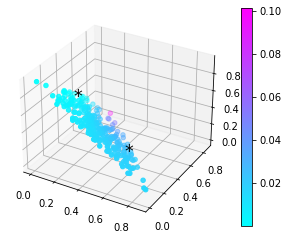

In [47]:
#Abundances and growth rate of A

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

#Change this lines to have different plots
for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].members.growth_rate['A']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')
plt.savefig("./figures/ab_agr.png", dpi=300)
plt.show()

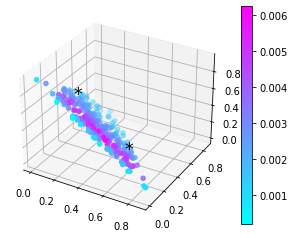

In [48]:
#Abundances and growth rate of B

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].members.growth_rate['B']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

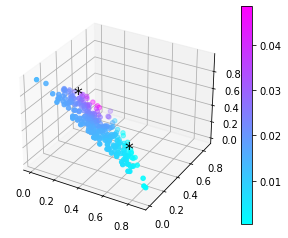

In [49]:
#Abundances and growth rate of C

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].members.growth_rate['C']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

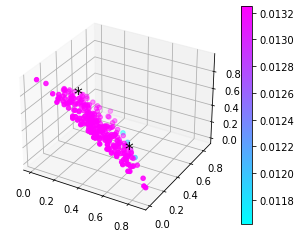

In [50]:
#Abundances and growth rate of the whole community

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].growth_rate

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

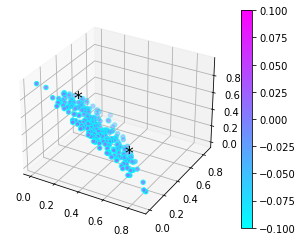

In [51]:
#Abundances and flux of exchange pyruvate

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].fluxes['EX_pyr_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

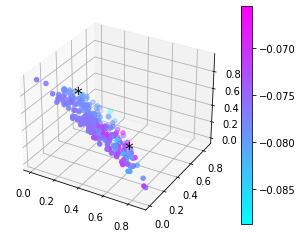

In [52]:
#Abundances and exchange oxygen

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_o2_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

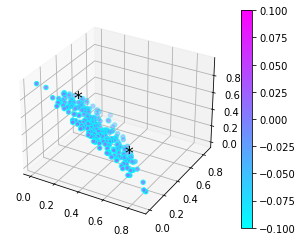

In [53]:
#Abundances and exchange alanine

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_ala_L_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

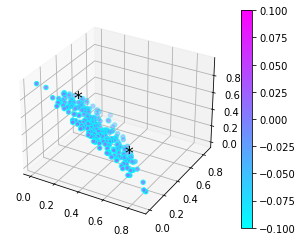

In [54]:
#Abundances and exchange lactate D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_lac_D_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

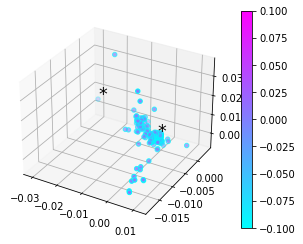

In [55]:
#Individual alanine exchanges and general exchange alanine

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_ala_L_b']['A']
    y[i] = sol[i].fluxes['EX_ala_L_b']['B']
    z[i] = sol[i].fluxes['EX_ala_L_b']['C']
    c[i] = sol[i].fluxes['EX_ala_L_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_ala_L_b']['A'], sol[126].fluxes['EX_ala_L_b']['B'], sol[126].fluxes['EX_ala_L_b']['C'], "*", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_ala_L_b']['A'], sol[127].fluxes['EX_ala_L_b']['B'], sol[127].fluxes['EX_ala_L_b']['C'], "*", color='black', size='xx-large')

plt.show()

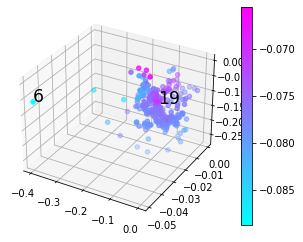

In [56]:
#Individual oxygen exchanges and general exchange oxygen

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_o2_b']['A']
    y[i] = sol[i].fluxes['EX_o2_b']['B']
    z[i] = sol[i].fluxes['EX_o2_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_o2_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_o2_b']['A'], sol[126].fluxes['EX_o2_b']['B'], sol[126].fluxes['EX_o2_b']['C'], "6", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_o2_b']['A'], sol[127].fluxes['EX_o2_b']['B'], sol[127].fluxes['EX_o2_b']['C'], "19", color='black', size='xx-large')

plt.show()

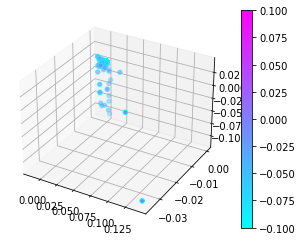

In [57]:
#Individual pyruvate exchanges and general exchange pyruvate

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_pyr_b']['A']
    y[i] = sol[i].fluxes['EX_pyr_b']['B']
    z[i] = sol[i].fluxes['EX_pyr_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_pyr_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)
plt.show()

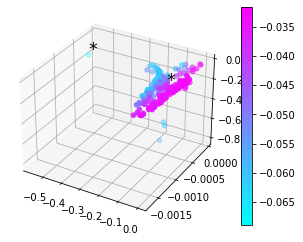

In [58]:
#Individual galactose exchanges and general exchange galactose

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_gal_b']['A']
    y[i] = sol[i].fluxes['EX_gal_b']['B']
    z[i] = sol[i].fluxes['EX_gal_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_gal_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_gal_b']['A'], sol[126].fluxes['EX_gal_b']['B'], sol[126].fluxes['EX_gal_b']['C'], "*", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_gal_b']['A'], sol[127].fluxes['EX_gal_b']['B'], sol[127].fluxes['EX_gal_b']['C'], "*", color='black', size='xx-large')

plt.show()

In [ ]:
# TODO: create figures for this reactions

'''{'3HCO3_NAt': 1,
 'ATPS4m': 1,
 'CYOOm3': 1,
 'CYOR_u10m': 1,
 'EX_hco3_LPAREN_e_RPAREN_': 1,
 'EX_hco3_b': 1,
 'EX_leu_L_LPAREN_e_RPAREN_': 1,
 'EX_leu_L_b': 1,
 'EX_nh4_LPAREN_e_RPAREN_': 1,
 'EX_nh4_b': 1,
 'EX_o2_LPAREN_e_RPAREN_': 1,
 'EX_o2_b': 1,
 'EX_ser_L_LPAREN_e_RPAREN_': 1,
 'EX_ser_L_b': 1,
 'G3PD1': 1,
 'GLUB0AT3tc': 1,
 'O2t': 1,
 'O2tm': 1,
 'TKT1': 1,
 'TKT2': 1,
 'r0838': 1}'''


plt.close()

In [42]:
#Obtain mean and other statistics of fluxes

In [43]:
solt = sol.copy()

for s in solt:
    s.fluxes = s.fluxes.fillna(0)

In [44]:
# Print mean (first line), variance (2nd line) and standard deviation (3rd line) for each flux
import statistics as st
for r in solt[0].fluxes:
    if 'EX_' in r:
        print(r)
        try:
            print(np.mean([s.fluxes[r]['A'] for s in solt]), np.mean([s.fluxes[r]['B'] for s in solt]), np.mean([s.fluxes[r]['C'] for s in solt]))
            print(st.pvariance([s.fluxes[r]['A'] for s in solt]), st.pvariance([s.fluxes[r]['B'] for s in solt]), st.pvariance([s.fluxes[r]['C'] for s in solt]))
            print(st.pstdev([s.fluxes[r]['A'] for s in solt]), st.pstdev([s.fluxes[r]['B'] for s in solt]), st.pstdev([s.fluxes[r]['C'] for s in solt]), end='\n\n')
        except:
            print('error',end='\n\n\n')

EX_2hb_LPAREN_e_RPAREN_
-4.967255904379701e-05 0.0 1.0833602528803182e-05
7.818294212447817e-08 0.0 3.2192587004080092e-09
0.0002796121279996241 0.0 5.6738511616079686e-05

EX_2hb_b
-4.967255904379701e-05 0.0 1.0833602528803182e-05
7.818294212447817e-08 0.0 3.2192587004080092e-09
0.0002796121279996241 0.0 5.6738511616079686e-05

EX_2hb_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4mo

0.0 0.0 0.0

EX_chsterol_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cit_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cit_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cit_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_citr_L_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_citr_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cl_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cl_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cl_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_co2_LPAREN_e_RPAREN_
0.07683896982767892 0.08682399943493188 0.12218314986643734
0.003318237429753857 0.006286295259128947 0.003258315455266984
0.05760414420641849 0.07928616057754939 0.057081656031224115

EX_co2_b
0.07683896982767892 0.08682399943493188 0.12218314986643734
0.003318237429753857 0.006286295259128947 0.003258315455266984
0.05760414420641849 0.07928616057754939 0.057081656031224115

EX_co2_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_creat_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_creat_b
0.0 0.0 0.0


0.0014675434868459656 0.0013596430614093297 0.010643763244190176

EX_his_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ile_L_LPAREN_e_RPAREN_
-0.006469482849338217 -0.0060618949522088334 -0.00863867266295954
1.1030471838442705e-05 9.468080745463008e-06 1.5992966360139992e-05
0.003321215415844432 0.0030770246579224884 0.00399912069837108

EX_ile_L_b
-0.006469482849338217 -0.0060618949522088334 -0.00863867266295954
1.1030471838442705e-05 9.468080745463008e-06 1.5992966360139992e-05
0.003321215415844432 0.0030770246579224884 0.00399912069837108

EX_ile_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_inost_LPAREN_e_RPAREN_
-0.0017057999215205903 -0.006212223140549009 -0.0005360081953924334
4.370196122015645e-06 4.0783330441918564e-05 6.525917980016173e-08
0.0020905014044519665 0.006386182775486352 0.00025545876340451063

EX_inost_b
-0.0017057999215205903 -0.006212223140549009 -0.0005360081953924334
4.370196122015645e-06 4.0783330441918564e-05 6.525917980016173e-08
0.0020905014044519665 0.0063861

0.0011111728702534601 -0.0028432579963319155 0.0
1.7099649829239813e-05 1.807598185359904e-05 0.0
0.004135172285315306 0.004251585804567402 0.0

EX_pro_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ps_hs_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ps_hs_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ps_hs_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ptrc_LPAREN_e_RPAREN_
0.0 1.539188938203896e-05 0.0
0.0 6.012135372904476e-08 0.0
0.0 0.00024519656141358255 0.0

EX_ptrc_b
0.0 1.539188938203896e-05 0.0
0.0 6.012135372904476e-08 0.0
0.0 0.00024519656141358255 0.0

EX_ptrc_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pydx_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pydx_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pydx_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pydxn_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pydxn_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pydxn_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pyr_LPAREN_e_RPAREN_
-0.004486746125572354 -0.030080002116177364

0.001967083882716344 0.0026462821155507485 0.0

EX_xylt_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0



In [45]:
#PCA of fluxes by population (A, B and C)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [46]:
#Separating reactions per compartment/sub-population

A_d = {}
B_d = {}
C_d = {}
m_d = {}

for r in solt[0].fluxes:
    try:
        A_d[r]=[s.fluxes[r]['A'] for s in sol]
    except:
        A_d[r]=[0]*len(sol)
        
    try: 
        B_d[r]=[s.fluxes[r]['B'] for s in sol]
    except:
        B_d[r]=[0]*len(sol)
        
    try:
        C_d[r]=[s.fluxes[r]['C'] for s in sol]
    except:
        C_d[r]=[0]*len(sol)
        
    try:
        m_d[r]=[s.fluxes[r]['medium'] for s in sol]
    except:
        m_d[r]=[0]*len(sol)
                
for r in solt[159].fluxes:
    if r not in A_d:
        try:
            A_d[r]=[s.fluxes[r]['A'] for s in sol]
        except:
            A_d[r]=[0]*len(sol)

        try: 
            B_d[r]=[s.fluxes[r]['B'] for s in sol]
        except:
            B_d[r]=[0]*len(sol)

        try:
            C_d[r]=[s.fluxes[r]['C'] for s in sol]
        except:
            C_d[r]=[0]*len(sol)

        try:
            m_d[r]=[s.fluxes[r]['medium'] for s in sol]
        except:
            m_d[r]=[0]*len(sol)

In [47]:
# Transforming data to dataframe
dfA = pd.DataFrame(data=A_d)
dfB = pd.DataFrame(data=B_d)
dfC = pd.DataFrame(data=C_d)
dfm = pd.DataFrame(data=m_d)

In [48]:
# Eliminating fluxes that are all zero (0) to have a better PCA
dfA = dfA.loc[:, (dfA != 0).any(axis=0)]
dfB = dfB.loc[:, (dfB != 0).any(axis=0)]
dfC = dfC.loc[:, (dfC != 0).any(axis=0)]
dfm = dfm.loc[:, (dfm != 0).any(axis=0)]

In [51]:
#PCA for A

In [52]:
# Define PCA scaler (normalization, etc) and fitting it
scaler = StandardScaler()
scaler.fit(dfA)
pcaA = scaler.transform(dfA)

In [53]:
# Running PCA
pca = PCA(n_components=4) # estimate only 4 PCs
pcaA_new = pca.fit_transform(pcaA)

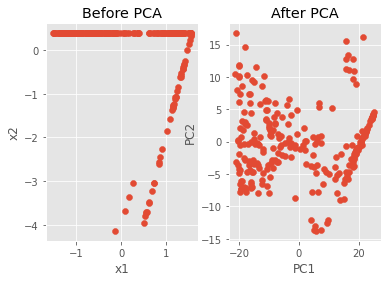

In [57]:
# PCA allows us to have a better dispertion of the data based on only x variables (in this case PCs). 
# Without it, and in the need of only using two variables to represent our data, we can end up with something like the left 
# plot. With PCA, we can use only two variables (PCs) and have a better distribution (right plot).

'''**** This is not a comparison of PCs vs reactions. It is only a demonstration of the application of PCA ****'''

# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaA[:,141], pcaA[:,154])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaA_new[:,0], pcaA_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [59]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfA.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,2HBO,3DSPHR,3HBCOAHLm,3HCO3_NAt,4MOPt2im,4MOPte,AACOAT,ACACT1r,ACACT1rm,ACACtx,...,r2093,r2099,r2104,r2108,r2109,r2114,r2136,r2407,r2408,xmpt
PC1,0.013385,-0.062195,-0.009795,0.064272,-0.060225,0.007024,-0.060520,0.060520,0.012435,0.020201,...,0.008419,-0.015797,-0.018902,-0.003913,-0.013385,-0.000801,-0.063747,-0.000197,0.004129,0.032174
PC2,0.073745,-0.018013,-0.092917,-0.011464,0.009062,0.019837,0.019663,-0.019663,-0.038946,-0.063537,...,0.064820,-0.030373,-0.072998,0.015778,-0.073745,-0.018093,-0.018080,-0.069557,-0.042379,-0.109209
PC3,0.099324,0.003169,0.055039,0.001614,0.037466,0.003644,0.045115,-0.045115,-0.104164,0.115730,...,0.111450,0.017827,-0.083685,0.029395,-0.099324,-0.047905,-0.007571,0.015977,-0.005111,0.007790
PC4,0.102575,0.025792,0.092943,-0.002673,-0.054549,-0.003336,-0.037167,0.037167,0.107012,-0.092248,...,0.105785,0.018121,-0.094149,-0.003067,-0.102575,-0.000809,0.009698,0.108451,0.068512,0.011347


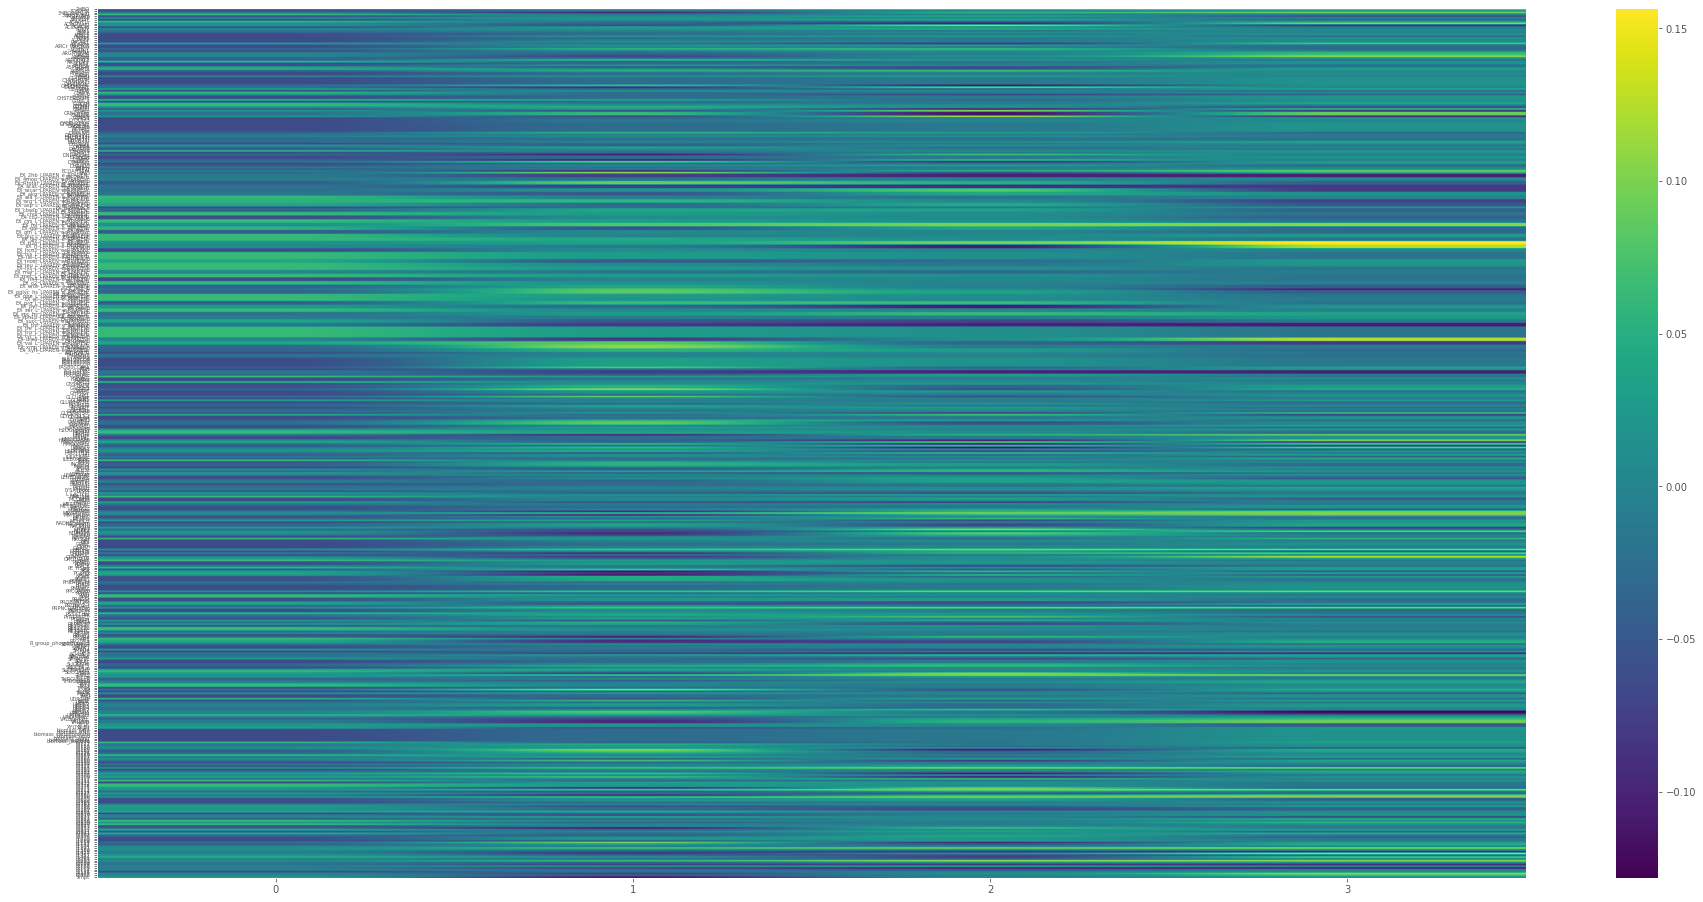

In [61]:
# We plot the Principal Components obtained against each other. This allows us to quickly see our PC components distribution
# Most meaningful components (explain variance) are colored in yellow or blue/purple.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfA.columns)), dfA.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=5)
plt.colorbar();

In [63]:
# Percent of variance explained by every principal component
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.50255118 0.06561906 0.05578322 0.04112107]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.50255118 0.56817024 0.62395346 0.66507452]


In [65]:
# From each PC we obtained the min and max values.
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.06427162793594476 -0.06425962278596974
0.11969163969170554 -0.11074549750718768
0.11573011191870532 -0.11573011191870525
0.15664756886150438 -0.12825076267994295


In [66]:
# Using data from only the first PC, we will obtain the most variable reactions in population A
nums_a = {}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.063:
        print(i, p)
        nums_a[i]=1

3 0.06427162793594476
17 -0.06370881115639537
35 -0.06394469869554646
36 -0.06315817041604786
48 -0.06300173796012908
61 -0.06407347341030056
62 -0.06407347341030052
112 0.06300173796012908
113 0.06300173796012908
124 0.06340148490994686
125 0.06340148490994686
132 -0.06425962278596972
133 -0.06425962278596974
140 0.06365076048914811
141 0.06365076048914811
148 -0.0636806768020837
149 -0.0636806768020837
150 0.06414184915029661
151 0.06414184915029661
159 0.06374696860891729
160 0.06374696860891729
165 0.06404250074133752
166 0.06404250074133752
189 -0.06395013113773552
204 -0.06399187576132609
205 0.06387779973211154
216 -0.06340617397915506
224 -0.06370881115639544
268 0.06374746763153012
270 -0.06389514957831606
282 -0.06331516427312724
290 -0.06334202150364578
292 -0.06334202150364579
293 -0.06414184915029661
295 -0.06407347341030058
296 -0.06413762074256663
323 0.06334202150364579
340 0.06362931716315419
341 0.06332278455503806
346 0.06333591363160251
351 -0.06312753204222778
362 

In [67]:
# Names of most variable reactions
a_var={}
for i,r in enumerate(dfA.columns):
    if i in nums_a:
        print(r, end='  ')
        a_var[r]=1

3HCO3_NAt  AGPAT1  ATPS4m  ATPtm  CHOLt4  CYOOm3  CYOR_u10m  EX_chol_LPAREN_e_RPAREN_  EX_chol_b  EX_glu_L_LPAREN_e_RPAREN_  EX_glu_L_b  EX_hco3_LPAREN_e_RPAREN_  EX_hco3_b  EX_leu_L_LPAREN_e_RPAREN_  EX_leu_L_b  EX_nh4_LPAREN_e_RPAREN_  EX_nh4_b  EX_o2_LPAREN_e_RPAREN_  EX_o2_b  EX_pi_LPAREN_e_RPAREN_  EX_pi_b  EX_ser_L_LPAREN_e_RPAREN_  EX_ser_L_b  FADH2ETC  FUMm  G3PD1  GLUB0AT3tc  GPAM_hs  MALtm  MDH  NADH2_u10m  NICRNS  NP1  O2t  O2tm  OAADC  PPM  RE3273C  RE3301C  RPE  SERtN1  SUCD1m  TKT1  TKT2  r0249  r0391  r0838  r0840  r0841  r2136  

In [68]:
# Using data from only the first PC, we will obtain the least variable reactions in population A
mi=1000
for i in abs(pca.components_[0]):
    if i!=0 and i<mi:
        mi = i
        
print(mi)

0.0001969721647644817
0.0003001860833969617
5.435671767154348e-05
0.00024997404286663367


In [36]:
numss_a = {}
ex = 20
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_a[i]=1

NameError: name 'pca' is not defined

In [70]:
# Names of least variable reactions in A
a_nvar={}
for i,r in enumerate(dfA.columns):
    if i in numss_a:
        print(r, end='  ')
        a_nvar[r]=1

ACt2r  ARGNm  EX_urea_LPAREN_e_RPAREN_  EX_urea_b  ORNTArm  RETNt  UREAt5  UREAtm  r0819  r0821  r1144  r1427  r2114  r2407  

In [71]:
#Intersect between var and non-var reac
for i in a_nvar.keys():
    if i in a_var:
        print(i)

In [72]:
#PCA for B -> Exact same process as A

In [73]:
scaler = StandardScaler()
scaler.fit(dfB)
pcaB = scaler.transform(dfB)

pca = PCA(n_components=4) # estimate only 2 PCs
pcaB_new = pca.fit_transform(pcaB)

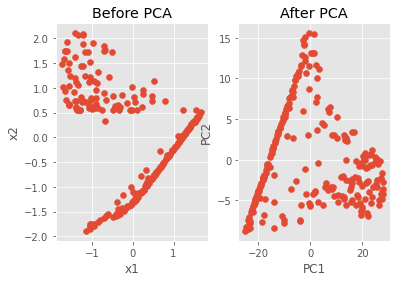

In [74]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaB[:,146], pcaB[:,160])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaB_new[:,0], pcaB_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()


In [75]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfB.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,3DSPHR,3HCO3_NAt,4MOPt2im,4MOPte,AACOAT,ACACT1r,ACACtx,ACCOACm,ACt2m,ACt2r,...,r2099,r2101,r2104,r2105,r2114,r2136,r2400,r2404,r2416,xmpt
PC1,0.060007,-0.061436,-0.015042,-0.015042,0.056553,-0.056553,-0.058101,0.057712,0.002918,0.002767,...,0.028229,0.000611,0.003295,0.003506,0.000247,0.060995,-0.009254,-0.009254,-0.000451,-0.016674
PC2,0.035422,0.007697,-0.038702,-0.038702,-0.063760,0.063760,0.048104,-0.058697,-0.069656,-0.072783,...,-0.006494,-0.046671,0.048204,0.029178,0.042812,0.026864,0.008704,0.008704,0.022112,0.092577
PC3,-0.006209,-0.018452,0.014334,0.014334,0.006202,-0.006202,-0.008714,0.007187,0.008416,0.009026,...,0.030957,0.003293,-0.017514,-0.012247,-0.010607,-0.006601,-0.001528,-0.001528,-0.011457,0.065127
PC4,0.007177,0.004839,-0.052303,-0.052303,0.012742,-0.012742,0.008345,0.005157,0.016487,0.016907,...,-0.027843,0.009670,-0.021058,-0.067560,-0.007647,0.004716,-0.005967,-0.005967,-0.006869,0.040886


In [76]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.59005654 0.07796981 0.03625456 0.02577857]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.59005654 0.66802635 0.70428091 0.73005948]


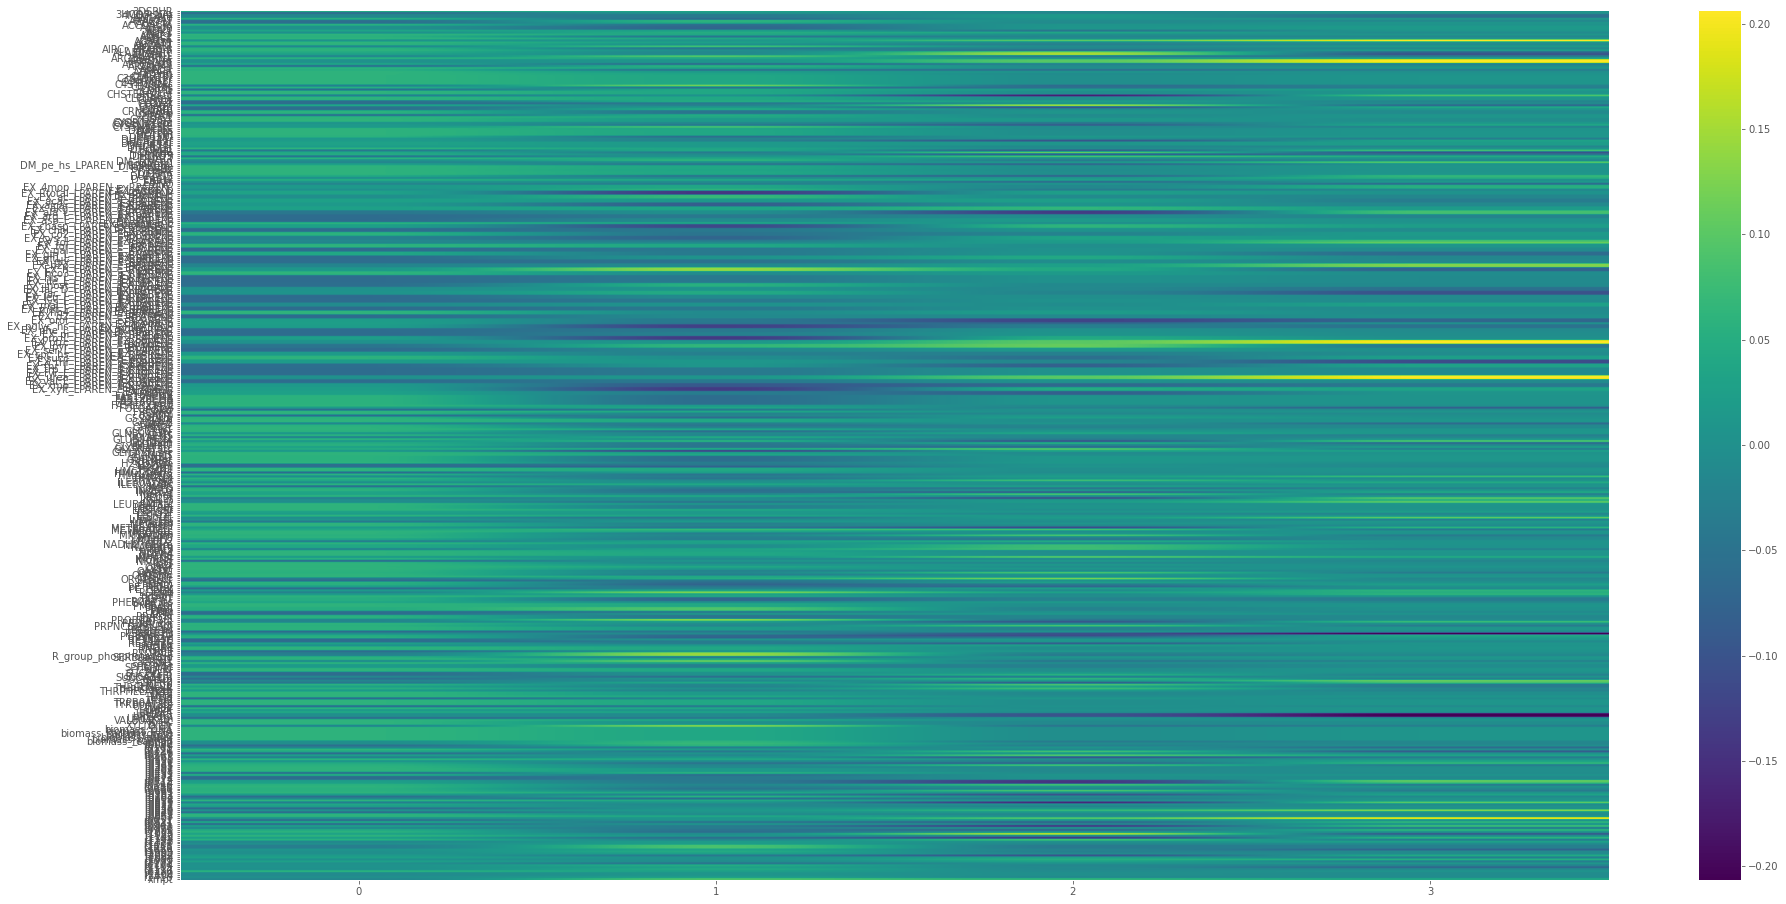

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfB.columns)), dfB.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=10)
plt.colorbar();


In [78]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.06159973751003522 -0.06159973751003522
0.14519991592331374 -0.14141260119723123
0.17386869428669652 -0.17386869428669652
0.20643960401703518 -0.20643960401703518


In [79]:
nums_b={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.061:
        print(i, p)
        nums_b[i]=1

1 -0.06143602457788097
31 0.061326227371958905
55 0.06140665584689057
56 0.06140665584689057
106 -0.0613995222934556
107 -0.0613995222934556
133 0.06143602457788099
134 0.06143602457788099
145 -0.06156365548307579
146 -0.06156365548307579
153 0.061322679173092365
154 0.061322679173092365
155 -0.06159973751003522
156 -0.06159973751003522
172 -0.061413126979677955
173 -0.061413126979677955
201 0.061177306566061955
206 -0.06121050656886622
218 0.06104712456837129
251 0.06156365548307579
282 0.06159973751003522
284 0.06140665584689057
312 0.061520961186429045
337 -0.061485495870073265
347 0.06117730656606194
348 0.06117730656606195
350 -0.06115132509848611
362 0.061280146965114676
363 0.061280146965114676
376 0.061177306566061955
386 0.06117730656606193
387 0.06117730656606194
406 -0.06156108215611538
412 -0.06150580878410141
414 -0.061449159518705165
420 0.0613995222934556


In [80]:
b_var={}
for i,r in enumerate(dfB.columns):
    if i in nums_b:
        print(r, end='  ')
        b_var[r]=1

3HCO3_NAt  ATPS4m  CYOOm3  CYOR_u10m  EX_asp_L_LPAREN_e_RPAREN_  EX_asp_L_b  EX_hco3_LPAREN_e_RPAREN_  EX_hco3_b  EX_leu_L_LPAREN_e_RPAREN_  EX_leu_L_b  EX_nh4_LPAREN_e_RPAREN_  EX_nh4_b  EX_o2_LPAREN_e_RPAREN_  EX_o2_b  EX_ser_L_LPAREN_e_RPAREN_  EX_ser_L_b  FBA  G3PD1  GLUB0AT3tc  LEUB0AT3tc  O2t  O2tm  PROtm  SUCCt2m  TKT1  TKT2  TPI  XYLK  XYLTD_Dr  r0191  r0407  r0408  r0838  r0911  r0941  r1143  

In [81]:
mi=min(abs(pca.components_[0]))
print(mi)

0.00024732962616114276
0.00011953501614726442
0.0003556275896343839
0.0002429633475827178


In [82]:
numss_b={}
ex = 20
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_b[i]=1

8 0.0029177968459015205
9 0.0027671799694158816
11 -0.0004110064208638889
15 0.0024913491644776723
25 0.0024913491644776723
26 0.0024913491644776723
76 -0.0011286778056373017
85 -0.0025540817062986105
91 -0.0011286778056373017
94 -0.00291779684590152
95 -0.00291779684590152
141 0.0025540817062986105
142 0.0025540817062986105
168 0.0024913491644776723
169 0.0024913491644776723
186 0.0024913491644776723
187 0.0024913491644776723
240 -0.002126912844196182
249 -0.0025540817062986105
317 -0.0024913491644776723
323 0.00228079151690624
358 -0.0024913491644776723
359 -0.0024913491644776723
372 -0.0011286778056373017
373 -0.0029177968459015205
407 0.003424295447651295
411 0.0024913491644776723
424 -0.0004510123199802077
428 -0.0006433544702885974
429 -0.0007757159313210977
432 0.0005252149703633992
434 0.0006106073266800089
435 0.003295004742422946
436 0.003505608729100651
437 0.00024732962616114276
441 -0.00045101231998020773


In [83]:
b_nvar={}
for i,r in enumerate(dfB.columns):
    if i in numss_b:
        print(r, end='  ')
        b_nvar[r]=1

ACt2m  ACt2r  ADK3  AGMTm  ARGDCm  ARGtm  DM_Lcystin  D_LACt2  EX_Lcystin_b  EX_ac_LPAREN_e_RPAREN_  EX_ac_b  EX_lac_D_LPAREN_e_RPAREN_  EX_lac_D_b  EX_ptrc_LPAREN_e_RPAREN_  EX_ptrc_b  EX_urea_LPAREN_e_RPAREN_  EX_urea_b  ILEB0AT2tc  LDH_D  PTCRTD  RETNt  UREAt5  UREAtm  r0027  r0062  r0839  r0907  r1427  r1992  r2000  r2093  r2101  r2104  r2105  r2114  r2416  

In [84]:
#Intersect between var and non-var reac
for i in b_nvar.keys():
    if i in b_var:
        print(i)

In [85]:
#PCA for C

In [86]:
scaler = StandardScaler()
scaler.fit(dfC)
pcaC = scaler.transform(dfC)

pca = PCA(n_components=4) # estimate only 2 PCs
pcaC_new = pca.fit_transform(pcaC)

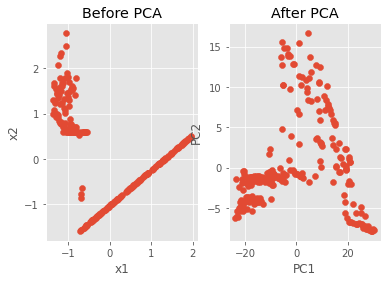

In [87]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaC[:,123], pcaC[:,131])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaC_new[:,0], pcaC_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [88]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfC.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,2HBO,3DSPHR,3HBCOAHLm,3HCO3_NAt,3MOBt2im,3MOPt2im,AACOAT,ACACT10m,ACACT1r,ACACt2,...,r2079,r2086,r2097,r2109,r2136,r2471,r2473,r2521,r2526,r2534
PC1,0.014867,-0.062082,0.016380,0.061160,0.015062,0.008377,-0.061293,0.014178,0.061293,0.033627,...,-0.016139,-0.005409,-0.021078,-0.014212,-0.062082,0.012056,-0.012132,0.012132,-0.062076,-0.062090
PC2,0.023477,0.007028,0.082193,0.022210,0.073674,0.078293,-0.011507,0.154689,0.011507,0.074752,...,-0.024541,-0.011416,-0.034802,-0.020454,0.007028,-0.025030,-0.006114,0.006114,0.007217,0.006614
PC3,-0.143905,-0.002277,0.075402,-0.000142,0.068294,0.061209,0.000817,0.055204,-0.000817,0.065009,...,0.139112,0.060772,0.088393,0.131744,-0.002277,0.004994,-0.001122,0.001122,-0.002313,0.000106
PC4,0.057058,0.000828,0.204446,0.011535,0.181368,0.099993,0.032405,-0.038780,-0.032405,0.103556,...,-0.053924,-0.021698,-0.009421,-0.053895,0.000828,-0.014864,-0.026855,0.026855,0.000946,-0.000116


In [89]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.65840174 0.08471488 0.04491613 0.03159628]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.65840174 0.74311662 0.78803275 0.81962902]


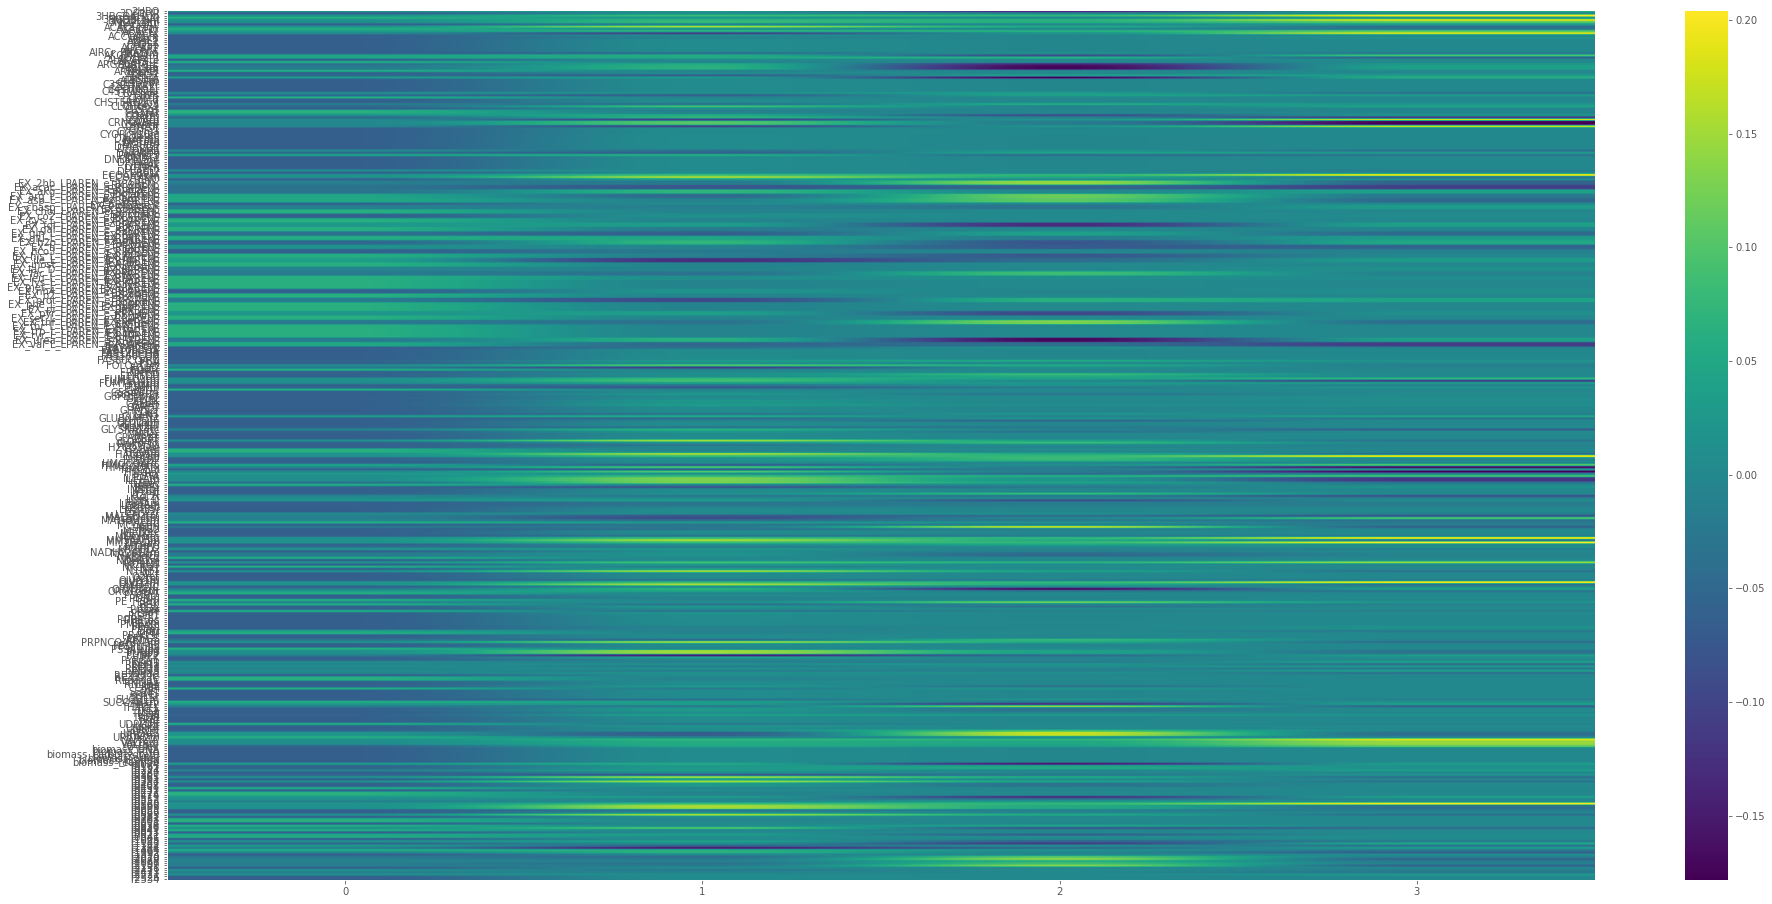

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfC.columns)), dfC.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=10)
plt.colorbar();

In [91]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.06213230695412864 -0.062121427714115586
0.15468855750727564 -0.15176858163229837
0.17714383795527883 -0.17714383795527883
0.20444570334017906 -0.1782080899114668


In [92]:
nums_c={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.0623212723578404:
        print(i, p)
        nums_c[i]=1
        

In [93]:
c_var={}
for i,r in enumerate(dfC.columns):
    if i in nums_c:
        print(r,end='  ')
        c_var[r]=1

In [94]:
mi=min(abs(pca.components_[0]))
print(mi)


0.0008122317380911059
0.0005769301306180601
0.00010569832282248693
8.196065401979588e-07


In [95]:
numss_c = {}
ex = 20
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_c[i]=1

0 0.014866952017900337
4 0.015062137529757508
5 0.008376984221978703
7 0.014178405480004954
10 0.000812231738091106
37 0.015090190004062826
47 0.01587014030064941
49 0.0008122317380911059
50 -0.0008122317380911072
51 -0.0008122317380911059
52 0.0008122317380911059
63 0.004188752072099957
72 0.008923051480670885
75 0.014178405480004952
77 -0.014866952017901
78 -0.014866952017901
88 -0.015090190004062826
89 -0.015090190004062826
106 0.015665522373473847
107 0.015665522373473847
116 -0.008923051480670885
117 -0.008923051480670885
160 0.008548504745133622
166 0.011299502407404724
167 0.013373648098541831
168 0.0033794988658734314
189 -0.002413755906591802
194 0.012540678198756207
200 0.014178405480004952
206 -0.0008122317380911059
208 -0.0008122317380911059
210 0.008376984221978705
211 0.011029380161278156
212 0.011029380161278156
219 -0.0013029918152273451
220 0.008923051480670885
227 0.006223634523599911
228 -0.011299502407404724
229 -0.013373648098541831
230 -0.0033794988658734314
239 0

In [96]:
c_nvar={}
for i,r in enumerate(dfC.columns):
    if i in numss_c:
        print(r)
        c_nvar[r]=1

2HBO
3MOBt2im
3MOPt2im
ACACT10m
ACACtx
CBASPte
CO2tm
COAtp
CRNCARtp
CSNATp
CSNATr
DHFR
D_LACt2
ECOAH9m
EX_2hb_LPAREN_e_RPAREN_
EX_2hb_b
EX_cbasp_LPAREN_e_RPAREN_
EX_cbasp_b
EX_h_LPAREN_e_RPAREN_
EX_h_b
EX_lac_D_LPAREN_e_RPAREN_
EX_lac_D_b
FOLOAT1tc
FUMSO3tm
FUMSO4tm
FUMTSULtm
GLYSNAT5tc
GUAPRT
HACD9m
HMGCOAtx
HMGLx
ILETA
ILETAm
ILEt5m
KCC2t
LDH_D
L_LACt2r
MALSO3tm
MALSO4tm
MALTSULtm
MMSAD3m
NTD11
OIVD3m
PGI
PRPNCOAHYDm
PUNP3
PUNP5
PUNP7
RDH1
RDH1a
RDH2
RDH2a
RDH3
RDH3a
THRD_L
VALTA
VALTAm
VALt5m
r0224
r0365
r0394
r0552
r0553
r0596
r0603
r0683
r0839
r1384
r1992
r2079
r2086
r2109
r2471
r2473
r2521


In [97]:
#Intersect between var and non-var reac
for i in c_nvar.keys():
    if i in c_var:
        print(i)

In [98]:
#PCA medium

In [99]:
scaler = StandardScaler()
scaler.fit(dfm)
pcam = scaler.transform(dfm)

pca = PCA(n_components=4) # estimate only 2 PCs
pcam_new = pca.fit_transform(pcam)

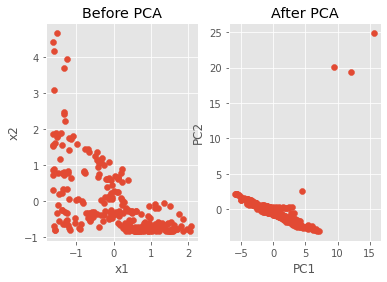

In [100]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcam[:,12], pcam[:,13])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcam_new[:,0], pcam_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [101]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfm.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,EX_Lcystin_m,EX_ac_m,EX_ala_L_m,EX_arg_L_m,EX_asp_L_m,EX_chol_m,EX_co2_m,EX_cys_L_m,EX_for_m,EX_gal_m,...,EX_pyr_m,EX_ser_L_m,EX_spc_hs_m,EX_sph1p_m,EX_succ_m,EX_thr_L_m,EX_trp_L_m,EX_tyr_L_m,EX_urea_m,EX_val_L_m
PC1,0.000371,0.047604,-0.230807,0.067544,-0.168462,0.135124,-0.064859,0.005714,0.254911,0.270511,...,-0.115872,0.250998,0.021367,-0.009252,0.229587,-0.244636,0.135142,0.135142,-0.061710,-0.073127
PC2,-0.007113,0.043020,0.088771,0.071312,0.117017,0.337152,-0.057352,0.022280,-0.123359,-0.097222,...,0.097622,-0.038973,-0.007089,0.014991,-0.124260,0.112386,0.337142,0.337142,-0.056065,0.078326
PC3,0.064393,0.106333,-0.079271,0.166418,0.194249,-0.043431,-0.371835,-0.066233,-0.165186,0.067551,...,0.283578,0.202896,0.036365,0.044051,-0.225983,0.134558,-0.043397,-0.043397,-0.169632,-0.140191
PC4,0.354985,-0.062121,0.170571,-0.472184,-0.036273,0.036190,-0.010146,-0.352723,-0.050569,0.094966,...,-0.139903,0.134963,0.141668,0.064572,0.004954,0.163290,0.036321,0.036321,0.477246,-0.083733


In [102]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.28642558 0.19355806 0.17908301 0.05995278]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.28642558 0.47998364 0.65906665 0.71901943]


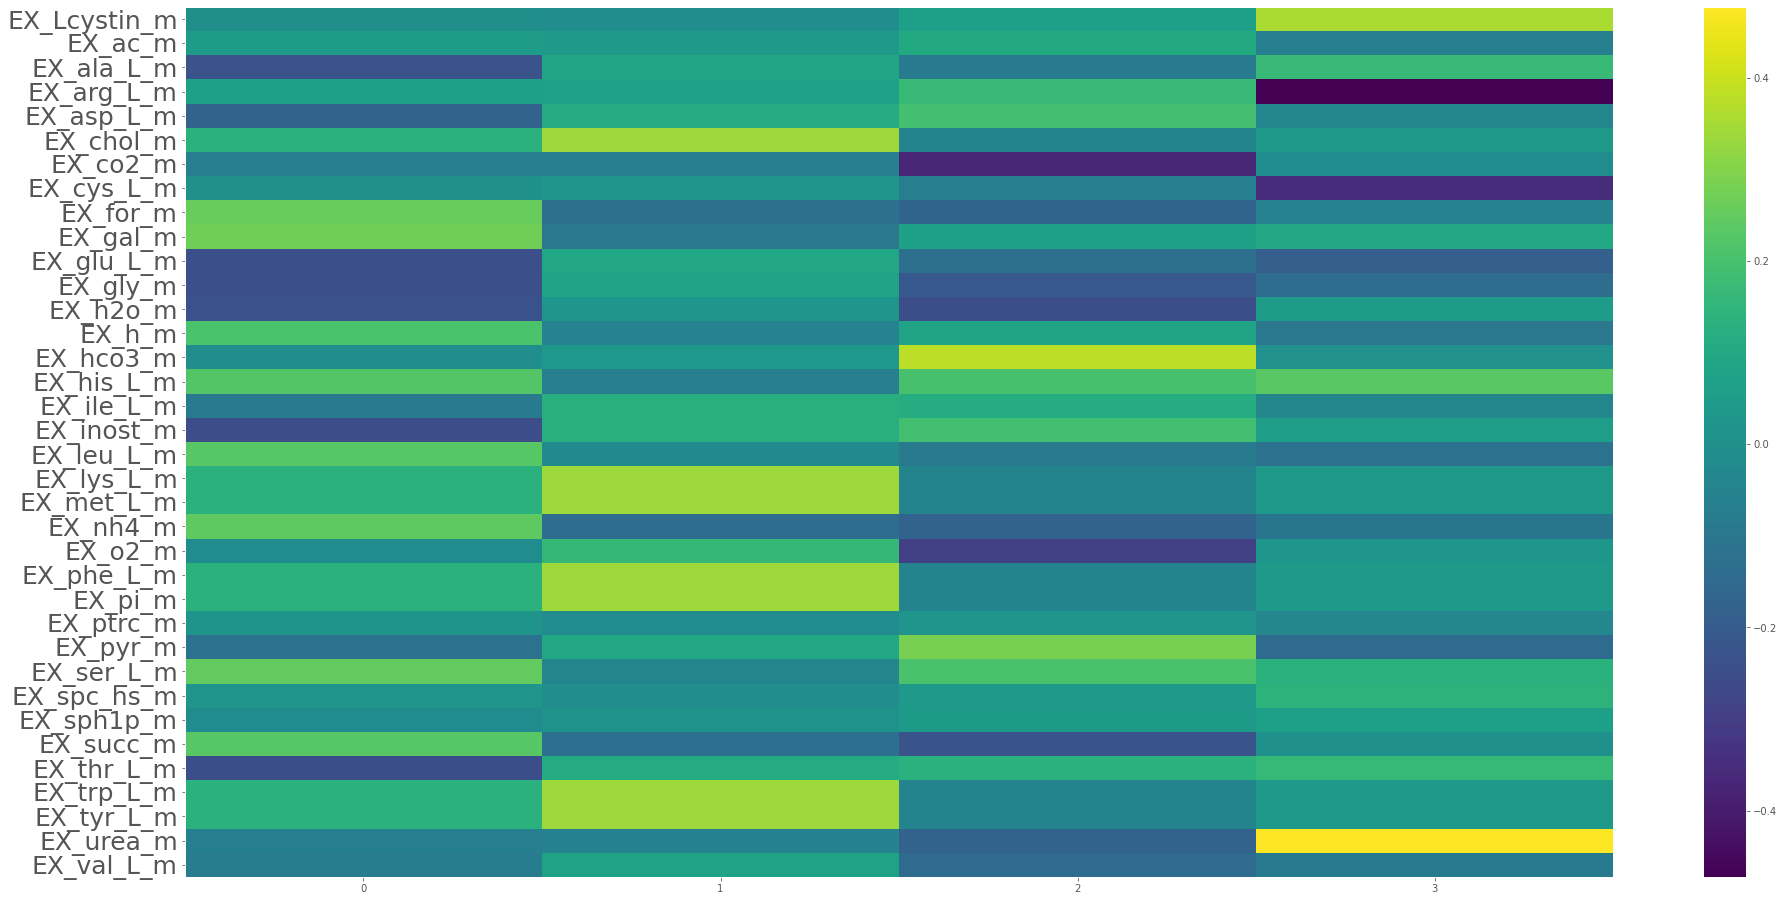

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfm.columns)), dfm.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=25)
plt.colorbar();

In [104]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.2705114030340576 -0.24644814466833678
0.33715161656055964 -0.1326534160584924
0.3813864954657471 -0.37183547910025777
0.4772459901928978 -0.47218374178854156


In [105]:
nums_m={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.25:
        print(i, p)
        nums_m[i]=1
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)>0.33:
        print(i, i, p)
        nums_m[i]=1

8 0.2549108120809511
9 0.2705114030340576
27 0.25099827915378287
5 5 0.33715161656055964
19 19 0.3371415731130947
20 20 0.3371415731130947
23 23 0.33714157311309484
24 24 0.33714284359861024
32 32 0.33714157311309456
33 33 0.3371415731130946


In [106]:
# Most variable
m_var={}
for i,r in enumerate(dfm.columns):
    if i in nums_m:
        print(r)
        m_var[r]=1

EX_chol_m
EX_for_m
EX_gal_m
EX_lys_L_m
EX_met_L_m
EX_phe_L_m
EX_pi_m
EX_ser_L_m
EX_trp_L_m
EX_tyr_L_m


In [107]:
mi=min(abs(pca.components_[0]))
print(mi)

mi2=min(abs(pca.components_[1]))
print(mi2)

mi3=min(abs(pca.components_[2]))
print(mi3)

mi4=min(abs(pca.components_[3]))
print(mi4)

0.0003708621897578123
0.007088634406904911
0.023009578913187393
0.00495357693915274


In [108]:
numss_m={}
ex = 5
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_m[i]=1

print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)<(mi2*ex*5) and p!=0:
        print(i, p)
        numss_m[i]=1
        

0 0.0003708621897578123
------------------------------------------------
0 -0.00711344167370684
1 0.04302048076715097
2 0.08877124666674892
3 0.07131156215006797
4 0.1170166574574688
6 -0.0573520645780336
7 0.022279925343654593
8 -0.123359295403554
9 -0.09722232425410768
10 0.0960050649679936
11 0.0771444734384667
12 0.0281171031992993
13 -0.05288518751260845
14 0.03326184715357529
15 -0.06469445373258326
16 0.12637991297725096
17 0.12205949619838796
18 -0.01955629871244246
21 -0.1326534160584924
22 0.15996125527277075
25 -0.012965992615625595
26 0.09762157745356133
27 -0.0389731349713389
28 -0.007088634406904911
29 0.01499093980949641
30 -0.12425966824844477
31 0.11238624034156779
34 -0.0560647143941541
35 0.07832550574906279


In [109]:
# Least variable
m_nvar={}
for i,r in enumerate(dfm.columns):
    if i in numss_m:
        print(r)
        m_nvar[r]=1

EX_Lcystin_m
EX_ac_m
EX_ala_L_m
EX_arg_L_m
EX_asp_L_m
EX_co2_m
EX_cys_L_m
EX_for_m
EX_gal_m
EX_glu_L_m
EX_gly_m
EX_h2o_m
EX_h_m
EX_hco3_m
EX_his_L_m
EX_ile_L_m
EX_inost_m
EX_leu_L_m
EX_nh4_m
EX_o2_m
EX_ptrc_m
EX_pyr_m
EX_ser_L_m
EX_spc_hs_m
EX_sph1p_m
EX_succ_m
EX_thr_L_m
EX_urea_m
EX_val_L_m


In [110]:
#Intersect between var and non-var reactions --> Discard these ones
for i in m_nvar.keys():
    if i in m_var:
        print(i)

EX_for_m
EX_gal_m
EX_ser_L_m


In [111]:
#Shared variable reactions between populations

In [112]:
all_var={}
for r in a_var.keys():
    if r in b_var or r in c_var:
        all_var[r]=1
        
for r in b_var.keys():
    if r in a_var or r in c_var:
        all_var[r]=1
        
for r in c_var.keys():
    if r in b_var or r in a_var:
        all_var[r]=1
        
all_var

{'3HCO3_NAt': 1,
 'ATPS4m': 1,
 'CYOOm3': 1,
 'CYOR_u10m': 1,
 'EX_hco3_LPAREN_e_RPAREN_': 1,
 'EX_hco3_b': 1,
 'EX_leu_L_LPAREN_e_RPAREN_': 1,
 'EX_leu_L_b': 1,
 'EX_nh4_LPAREN_e_RPAREN_': 1,
 'EX_nh4_b': 1,
 'EX_o2_LPAREN_e_RPAREN_': 1,
 'EX_o2_b': 1,
 'EX_ser_L_LPAREN_e_RPAREN_': 1,
 'EX_ser_L_b': 1,
 'G3PD1': 1,
 'GLUB0AT3tc': 1,
 'O2t': 1,
 'O2tm': 1,
 'TKT1': 1,
 'TKT2': 1,
 'r0838': 1}

In [113]:
#Shared non-variable reactions between populations
all_nvar={}
for r in a_nvar.keys():
    if r in b_nvar or r in c_nvar:
        all_nvar[r]=1
        
for r in b_nvar.keys():
    if r in a_nvar or r in c_nvar:
        all_nvar[r]=1
        
for r in c_nvar.keys():
    if r in b_nvar or r in a_nvar:
        all_nvar[r]=1
        
all_nvar

{'ACt2r': 1,
 'EX_urea_LPAREN_e_RPAREN_': 1,
 'EX_urea_b': 1,
 'RETNt': 1,
 'UREAt5': 1,
 'UREAtm': 1,
 'r1427': 1,
 'r2114': 1,
 'D_LACt2': 1,
 'EX_lac_D_LPAREN_e_RPAREN_': 1,
 'EX_lac_D_b': 1,
 'LDH_D': 1,
 'r0839': 1,
 'r1992': 1}

In [114]:
#Variable and Non-Variable reactions in A 
a_only_var={}
a_only_nvar={}

for r in a_var.keys():
    if r not in b_var and r not in c_var:
        a_only_var[r]=1
print(a_only_var)

for r in a_nvar.keys():
    if r not in b_nvar and r not in c_nvar:
        a_only_nvar[r]=1
a_only_nvar

{'AGPAT1': 1, 'ATPtm': 1, 'CHOLt4': 1, 'EX_chol_LPAREN_e_RPAREN_': 1, 'EX_chol_b': 1, 'EX_glu_L_LPAREN_e_RPAREN_': 1, 'EX_glu_L_b': 1, 'EX_pi_LPAREN_e_RPAREN_': 1, 'EX_pi_b': 1, 'FADH2ETC': 1, 'FUMm': 1, 'GPAM_hs': 1, 'MALtm': 1, 'MDH': 1, 'NADH2_u10m': 1, 'NICRNS': 1, 'NP1': 1, 'OAADC': 1, 'PPM': 1, 'RE3273C': 1, 'RE3301C': 1, 'RPE': 1, 'SERtN1': 1, 'SUCD1m': 1, 'r0249': 1, 'r0391': 1, 'r0840': 1, 'r0841': 1, 'r2136': 1}


{'ARGNm': 1, 'ORNTArm': 1, 'r0819': 1, 'r0821': 1, 'r1144': 1, 'r2407': 1}

In [115]:
#Variable and Non-Variable reactions in B

b_only_var={}
b_only_nvar={}

for r in b_var.keys():
    if r not in a_var and r not in c_var:
        b_only_var[r]=1
print(b_only_var)

for r in b_nvar.keys():
    if r not in a_nvar and r not in c_nvar:
        b_only_nvar[r]=1
b_only_nvar

{'EX_asp_L_LPAREN_e_RPAREN_': 1, 'EX_asp_L_b': 1, 'FBA': 1, 'LEUB0AT3tc': 1, 'PROtm': 1, 'SUCCt2m': 1, 'TPI': 1, 'XYLK': 1, 'XYLTD_Dr': 1, 'r0191': 1, 'r0407': 1, 'r0408': 1, 'r0911': 1, 'r0941': 1, 'r1143': 1}


{'ACt2m': 1,
 'ADK3': 1,
 'AGMTm': 1,
 'ARGDCm': 1,
 'ARGtm': 1,
 'DM_Lcystin': 1,
 'EX_Lcystin_b': 1,
 'EX_ac_LPAREN_e_RPAREN_': 1,
 'EX_ac_b': 1,
 'EX_ptrc_LPAREN_e_RPAREN_': 1,
 'EX_ptrc_b': 1,
 'ILEB0AT2tc': 1,
 'PTCRTD': 1,
 'r0027': 1,
 'r0062': 1,
 'r0907': 1,
 'r2000': 1,
 'r2093': 1,
 'r2101': 1,
 'r2104': 1,
 'r2105': 1,
 'r2416': 1}

In [116]:
#Variable and Non-Variable reactions in C

c_only_var={}
c_only_nvar={}

for r in c_var.keys():
    if r not in b_var and r not in a_var:
        c_only_var[r]=1
print(c_only_var)

for r in c_nvar.keys():
    if r not in b_nvar and r not in a_nvar:
        c_only_nvar[r]=1
c_only_nvar

{}


{'2HBO': 1,
 '3MOBt2im': 1,
 '3MOPt2im': 1,
 'ACACT10m': 1,
 'ACACtx': 1,
 'CBASPte': 1,
 'CO2tm': 1,
 'COAtp': 1,
 'CRNCARtp': 1,
 'CSNATp': 1,
 'CSNATr': 1,
 'DHFR': 1,
 'ECOAH9m': 1,
 'EX_2hb_LPAREN_e_RPAREN_': 1,
 'EX_2hb_b': 1,
 'EX_cbasp_LPAREN_e_RPAREN_': 1,
 'EX_cbasp_b': 1,
 'EX_h_LPAREN_e_RPAREN_': 1,
 'EX_h_b': 1,
 'FOLOAT1tc': 1,
 'FUMSO3tm': 1,
 'FUMSO4tm': 1,
 'FUMTSULtm': 1,
 'GLYSNAT5tc': 1,
 'GUAPRT': 1,
 'HACD9m': 1,
 'HMGCOAtx': 1,
 'HMGLx': 1,
 'ILETA': 1,
 'ILETAm': 1,
 'ILEt5m': 1,
 'KCC2t': 1,
 'L_LACt2r': 1,
 'MALSO3tm': 1,
 'MALSO4tm': 1,
 'MALTSULtm': 1,
 'MMSAD3m': 1,
 'NTD11': 1,
 'OIVD3m': 1,
 'PGI': 1,
 'PRPNCOAHYDm': 1,
 'PUNP3': 1,
 'PUNP5': 1,
 'PUNP7': 1,
 'RDH1': 1,
 'RDH1a': 1,
 'RDH2': 1,
 'RDH2a': 1,
 'RDH3': 1,
 'RDH3a': 1,
 'THRD_L': 1,
 'VALTA': 1,
 'VALTAm': 1,
 'VALt5m': 1,
 'r0224': 1,
 'r0365': 1,
 'r0394': 1,
 'r0552': 1,
 'r0553': 1,
 'r0596': 1,
 'r0603': 1,
 'r0683': 1,
 'r1384': 1,
 'r2079': 1,
 'r2086': 1,
 'r2109': 1,
 'r2471': 1,
 'r

In [117]:
# Get media and gcs 

# This is an important step to obtain the figures of the micom paper (check README)
# Generate data on fluxes, media and growth rates for each of the samples/communities

In [16]:
results=[]
def media_and_gcs(com, name):
    
    # Get growth rates
    sol = com.cooperative_tradeoff(fraction = 0.5, pfba = True, fluxes = True)
    rates = sol.members["growth_rate"].copy()
    rates["community"] = sol.growth_rate
    rates.name = name

    # Get the minimal medium
    med = minimal_medium(com, 0.95*sol.growth_rate, exports = True)
    med.name = name

    #Get fluxes
    com.medium = med[med > 0]
    fluxes = sol.fluxes
    fluxes["sample"] = name
    results.append({"medium": med, "gcs": rates, "fluxes":fluxes})

In [17]:
gcs = pd.DataFrame()
media = pd.DataFrame()
fluxes = pd.DataFrame()

In [18]:
for i,c in enumerate(com):
    temp='com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4))
    media_and_gcs(c,temp)
    print(i,' - ',temp)

0  -  com_0.5926_0.1428_0.2645
1  -  com_0.4204_0.1143_0.4653
2  -  com_0.2301_0.1709_0.5989
3  -  com_0.3846_0.4621_0.1533
4  -  com_0.6891_0.0611_0.2498
5  -  com_0.3257_0.0085_0.6658
6  -  com_0.6649_0.0871_0.248
7  -  com_0.1316_0.503_0.3654
8  -  com_0.3852_0.2782_0.3366
9  -  com_0.2242_0.113_0.6628
10  -  com_0.4273_0.4536_0.1191
11  -  com_0.0155_0.1524_0.8321
12  -  com_0.5852_0.4119_0.0029
13  -  com_0.1062_0.4532_0.4407
14  -  com_0.0081_0.5206_0.4712
15  -  com_0.1419_0.3597_0.4983
16  -  com_0.1644_0.5839_0.2518
17  -  com_0.1522_0.1018_0.746
18  -  com_0.3335_0.2976_0.369
19  -  com_0.3527_0.5428_0.1044
20  -  com_0.2245_0.5255_0.25
21  -  com_0.1076_0.4865_0.4058
22  -  com_0.3298_0.4181_0.2522
23  -  com_0.3484_0.1582_0.4933
24  -  com_0.1251_0.2178_0.6571
25  -  com_0.5002_0.2972_0.2026
26  -  com_0.4465_0.2393_0.3142
27  -  com_0.0165_0.3801_0.6033
28  -  com_0.3351_0.1051_0.5598
29  -  com_0.397_0.4065_0.1965
30  -  com_0.2502_0.4076_0.3422
31  -  com_0.8611_0.053_0.

254  -  com_0.0902_0.391_0.5188
255  -  com_0.5739_0.2739_0.1522


In [19]:
for s in results:
    gcs = gcs.append(s["gcs"])
    media = media.append(s["medium"])
    fluxes = fluxes.append(s["fluxes"])

In [20]:
gcs, media, fluxes

(                                 A         B         C  community  medium
 com_0.5926_0.1428_0.2645  0.037429  0.009020  0.016704   0.027889     NaN
 com_0.4204_0.1143_0.4653  0.028856  0.007844  0.031940   0.027889     NaN
 com_0.2301_0.1709_0.5989  0.014556  0.010811  0.037886   0.027889     NaN
 com_0.3846_0.4621_0.1533  0.027865  0.033478  0.011104   0.027889     NaN
 com_0.6891_0.0611_0.2498  0.035525  0.003149  0.012880   0.027889     NaN
 ...                            ...       ...       ...        ...     ...
 com_0.2492_0.3776_0.3732  0.020209  0.030614  0.030262   0.027889     NaN
 com_0.1994_0.0976_0.7031  0.010228  0.005004  0.036073   0.027889     NaN
 com_0.4746_0.1826_0.3428  0.035194  0.013542  0.025419   0.027889     NaN
 com_0.0902_0.391_0.5188   0.005849  0.025348  0.033637   0.027889     NaN
 com_0.5739_0.2739_0.1522  0.037436  0.017866  0.009925   0.027889     NaN
 
 [256 rows x 5 columns],
                           EX_arg_L_m  EX_chol_m  EX_co2_m  EX_cys_L_m  \

In [21]:
gcs.to_csv("./data/growth_rates_scan.csv")
media.to_csv("./data/minimal_media_scan.csv")
fluxes.to_csv("./data/minimal_fluxes_scan.csv.gz", compression = "gzip")

In [25]:
xx=media.fillna(0.0)

com_0.5926_0.1428_0.2645    0.009519
com_0.4204_0.1143_0.4653    0.009519
com_0.2301_0.1709_0.5989    0.009519
com_0.3846_0.4621_0.1533    0.009519
com_0.6891_0.0611_0.2498    0.009519
                              ...   
com_0.2492_0.3776_0.3732    0.009519
com_0.1994_0.0976_0.7031    0.009519
com_0.4746_0.1826_0.3428    0.009519
com_0.0902_0.391_0.5188     0.009519
com_0.5739_0.2739_0.1522    0.009519
Name: EX_arg_L_m, Length: 256, dtype: float64

In [ ]:
# tradeoffs --> Also important to generate figures

# Extracts data of tradeoffs of the communities -> i.e. data on the metabolic differences between communities

In [67]:
df=[]
for i,s in enumerate(sol):
    rates = s.members
    rates["sample"] = 'com_'+str(round(rates.abundance['A'],4))+'_'+str(round(rates.abundance['B'],4))+'_'+str(round(rates.abundance['C'],4))
    df.append(rates)

In [68]:
df = pd.concat(df)

In [69]:
df.to_csv("./data/tradeoff_scan.csv")

In [ ]:
#Knockout ---> Also important to generate figures

# It calculates the knockouts of the communities -> i.e. what happens with the remaining sub-populations
# if we eliminate one of them

In [7]:
kos=[]
for i,c in enumerate(com):
    kos.append(c.knockout_taxa(fraction=0.5))
    kos[i]["sample"] = 'com_'+str(round(c.abundances['A'],4))+'_'+str(round(c.abundances['B'],4))+'_'+str(round(c.abundances['C'],4))

pd.concat(kos).to_csv("./data/knockouts_scan.csv")

In [8]:
#elasticities  ---> Also important to generate figures

# It calculates the elasticities of the communities -> i.e. If metabolite flux increases by a unit, how much the rest of the 
# fluxes change by that same unit. 

In [ ]:
from micom.elasticity import elasticities
for i,c in enumerate(com[30:]):
    t = elasticities(c, fraction=0.5)
    t.to_csv('./data/elasticities/elasticities_'+str(i+30)+'.csv', index=False)
    print(i+30)


30



31



32



33



34



35



36



37


In [ ]:
#check all reactions that correspond to a certain metabolite

In [ ]:
met = '_pyr'
for i in range(len(sol)):
    print('---------------- Community:'+str(i)+' - '+str(met)+'------------------')
    for f in sol[i].fluxes:
        if met in f:
            print(f, sol[i].fluxes[f],end='\n\n')

In [ ]:
#track down all reactions where this metabolite is involved

In [ ]:
meta = 'pyr_'
track_sol={}
for i,c in enumerate(sol):
    react_metab=[]
    rm_flux=[]
    for r in com[i].reactions:
        if meta in r.reaction:
            react_metab.append((r.id,r.reaction))

    for r in react_metab:
        if '_m' not in r[0]:
            rm_flux.append((r,c.fluxes[r[0][:-3]]))
            #print(sol1.fluxes[r[0][:-3]],end='\n\n')
        else:
            rm_flux.append((r,c.fluxes[r[0]]))
            #print(sol1.fluxes[r[0]],end='\n\n')
    track_sol['com'+str(i)]=(rm_flux)

In [ ]:
mt = 'pyr_'
for t in track_sol:
    print(t)
    print(track_sol[t],end='\n\n\n\n')
    print('--------------------------------------------------------------------------------------------------------------------\n\n')
    